In [2]:
!python3 -m pip install pandas matplotlib numpy

  Using cached pandas-2.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 8.3 MB/s  0:00:01m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 8.3 MB/s  0:00:00 eta 0:00:01
Using cached numpy-2.3.2-cp313-cp313-macosx_11_0_arm64.whl (14.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [matplotlib]1 [matplotlib]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("✅ All packages are working in Jupyter now!")

Matplotlib is building the font cache; this may take a moment.


✅ All packages are working in Jupyter now!


In [6]:
import os, pandas as pd
os.makedirs("data", exist_ok=True)

csv_text = """drug,cell_line,log10_dose,response
DrugA,A549,-9,5.1
DrugA,A549,-8,9.3
DrugA,A549,-7,21.4
DrugA,A549,-6,48.0
DrugA,A549,-5,72.6
DrugA,A549,-4,88.3
DrugB,MCF7,-9,3.6
DrugB,MCF7,-8,6.9
DrugB,MCF7,-7,14.8
DrugB,MCF7,-6,32.1
DrugB,MCF7,-5,58.0
DrugB,MCF7,-4,80.1
"""
with open("data/dose_response.csv","w") as f:
    f.write(csv_text)

df = pd.read_csv("data/dose_response.csv")
df

,drug,cell_line,log10_dose,response
0,DrugA,A549,-9,5.1
1,DrugA,A549,-8,9.3
2,DrugA,A549,-7,21.4
3,DrugA,A549,-6,48.0
4,DrugA,A549,-5,72.6
5,DrugA,A549,-4,88.3
6,DrugB,MCF7,-9,3.6
7,DrugB,MCF7,-8,6.9
8,DrugB,MCF7,-7,14.8
9,DrugB,MCF7,-6,32.1


In [7]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# keep things tidy
os.makedirs("data", exist_ok=True)
os.makedirs("docs", exist_ok=True)

print("Ready ✅")


Ready ✅


In [9]:
# doses (log10 M). You can add more points if you like.
doses = np.array([-9, -8, -7, -6, -5, -4], dtype=float)

def hill(x, bottom, top, logIC50, slope):
    # logistic shape used to SIMULATE data (we're not fitting this)
    return bottom + (top - bottom) / (1 + 10**((logIC50 - x) * slope))

# parameters chosen to reflect biology:
# - lower logIC50 = higher potency
params = {
    ("EGFR_inhibitor", "A549"): {"bottom": 5, "top": 90, "logIC50": -6.6, "slope": 1.1},
    ("EGFR_inhibitor", "MCF7"): {"bottom": 5, "top": 85, "logIC50": -5.7, "slope": 1.0},
    ("Hormone_therapy", "A549"): {"bottom": 4, "top": 80, "logIC50": -5.4, "slope": 1.0},
    ("Hormone_therapy", "MCF7"): {"bottom": 4, "top": 88, "logIC50": -6.5, "slope": 1.1},
}

rng = np.random.default_rng(42)
rows = []
n_rep = 3  # number of replicates per dose

for (drug, cell), p in params.items():
    true_curve = hill(doses, **p)
    for rep in range(1, n_rep + 1):
        noise = rng.normal(0, 2.0, size=true_curve.size)  # small experimental noise
        y = np.clip(true_curve + noise, 0, 100)          # keep % response in [0, 100]
        for xval, yval in zip(doses, y):
            rows.append({
                "drug": drug,
                "cell_line": cell,
                "replicate": rep,
                "log10_dose": float(xval),
                "response": float(yval),
            })

df = pd.DataFrame(rows)
df.to_csv("data/dose_response.csv", index=False)
df

,drug,cell_line,replicate,log10_dose,response
0,EGFR_inhibitor,A549,1,-9.0,5.803713
1,EGFR_inhibitor,A549,1,-8.0,5.302740
2,EGFR_inhibitor,A549,1,-7.0,29.142038
3,EGFR_inhibitor,A549,1,-6.0,76.623222
4,EGFR_inhibitor,A549,1,-5.0,84.646030
...,...,...,...,...,...
67,Hormone_therapy,MCF7,3,-8.0,4.914644
68,Hormone_therapy,MCF7,3,-7.0,24.185065
69,Hormone_therapy,MCF7,3,-6.0,69.148278
70,Hormone_therapy,MCF7,3,-5.0,83.609279


drug             cell_line
EGFR_inhibitor   A549         6
                 MCF7         6
Hormone_therapy  A549         6
                 MCF7         6
dtype: int64

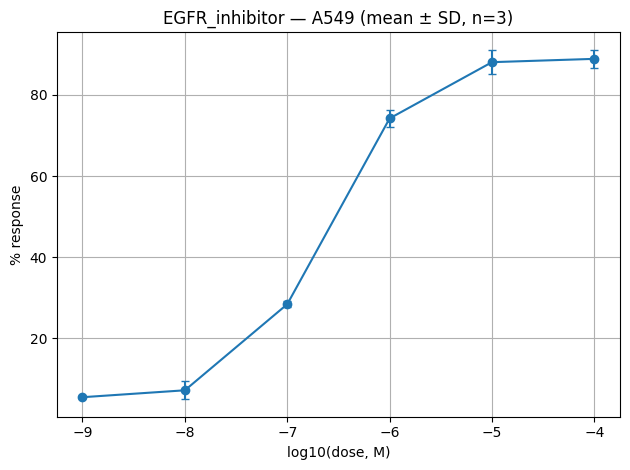

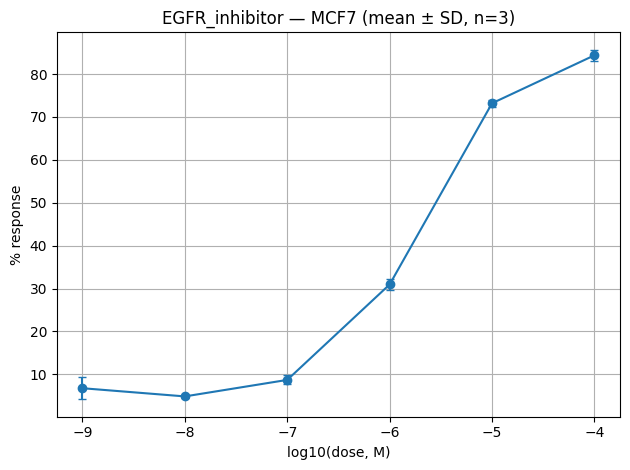

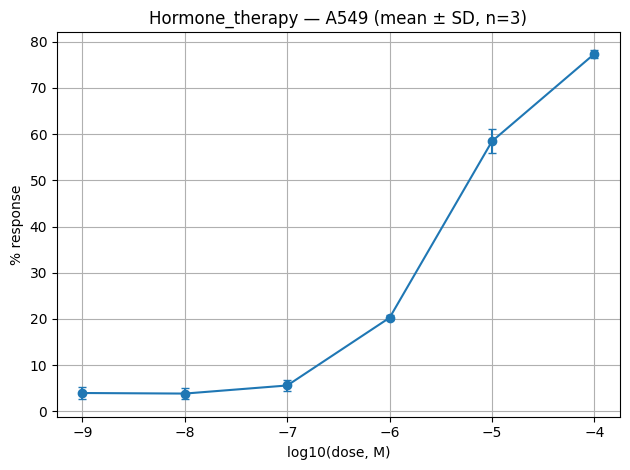

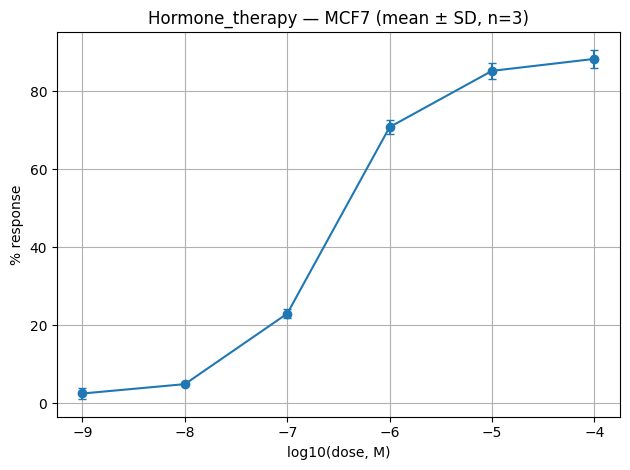

In [10]:
# aggregate replicates
agg = (df.groupby(["drug","cell_line","log10_dose"])
         .agg(mean=("response","mean"), std=("response","std"), count=("response","size"))
         .reset_index())

# quick sanity: what groups do we have?
display(agg.groupby(["drug","cell_line"]).size())

# plot each pair with error bars
for (drug, cell), sub in agg.groupby(["drug","cell_line"]):
    sub = sub.sort_values("log10_dose")
    plt.figure()
    plt.errorbar(sub["log10_dose"], sub["mean"], yerr=sub["std"], fmt="o-", capsize=3)
    plt.xlabel("log10(dose, M)")
    plt.ylabel("% response")
    plt.title(f"{drug} — {cell} (mean ± SD, n={int(sub['count'].iloc[0])})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
def interpolate_logIC50(x, y):
    """
    x: array of log10 doses
    y: array of mean responses at those doses
    Returns: estimated logIC50 (float) or NaN if not computable
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    # target = midpoint of observed response range (robust if not 0–100)
    y_bot, y_top = float(y.min()), float(y.max())
    y_target = y_bot + 0.5 * (y_top - y_bot)

    # sort by response so we can find the two points that straddle y_target
    order = np.argsort(y)
    y_sorted = y[order]
    x_sorted = x[order]

    idx = np.searchsorted(y_sorted, y_target) - 1
    if idx < 0 or idx >= len(y_sorted) - 1:
        return np.nan  # target outside observed range
    y1, y2 = y_sorted[idx], y_sorted[idx + 1]
    x1, x2 = x_sorted[idx], x_sorted[idx + 1]
    if y2 == y1:
        return np.nan

    # linear interpolation in response space
    t = (y_target - y1) / (y2 - y1)
    return x1 + t * (x2 - x1)

rows = []
for (drug, cell), sub in agg.groupby(["drug","cell_line"]):
    sub = sub.sort_values("log10_dose")
    logIC50 = interpolate_logIC50(sub["log10_dose"].values, sub["mean"].values)
    rows.append({
        "drug": drug,
        "cell_line": cell,
        "logIC50": logIC50,
        "IC50_M": float(10**logIC50) if np.isfinite(logIC50) else np.nan
    })

ic50 = pd.DataFrame(rows).sort_values(["drug","cell_line"])
display(ic50)

,drug,cell_line,logIC50,IC50_M
0,EGFR_inhibitor,A549,-6.590081,2.569917e-07
1,EGFR_inhibitor,MCF7,-5.676595,2.105739e-06
2,Hormone_therapy,A549,-5.467334,3.409304e-06
3,Hormone_therapy,MCF7,-6.531428,2.941522e-07


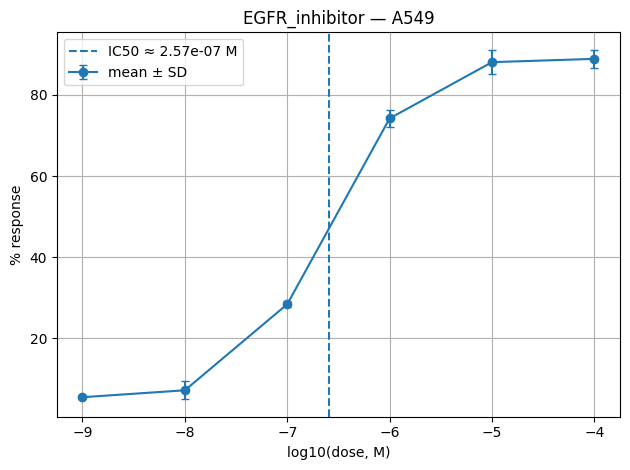

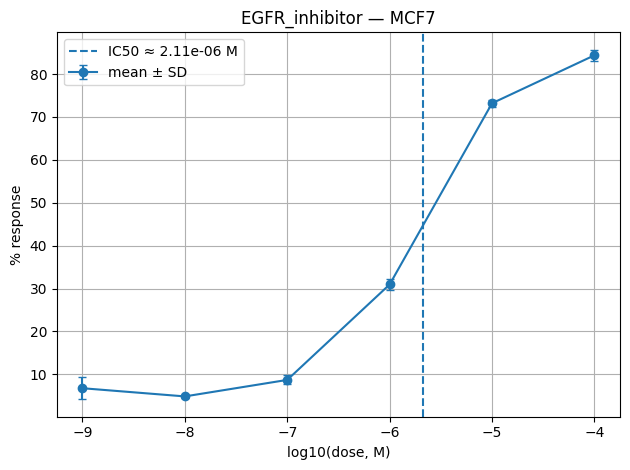

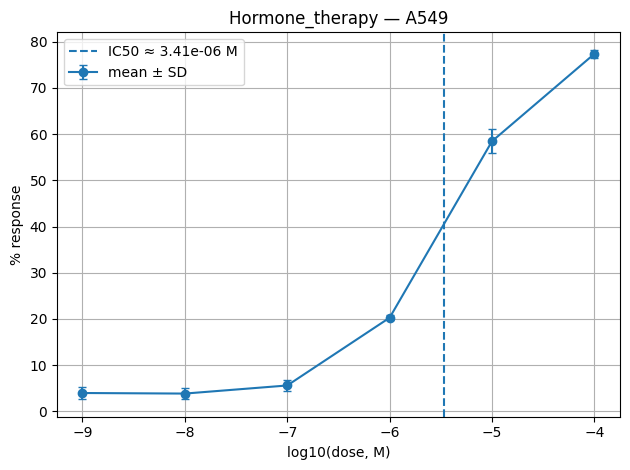

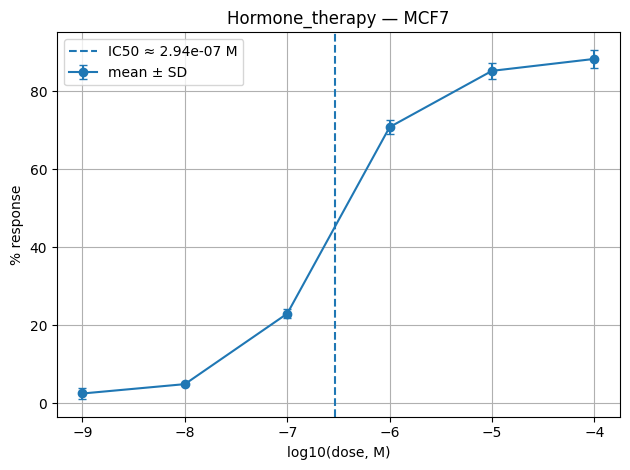

Saved: docs/ic50_bar.png and docs/ic50_summary.csv ✅


In [12]:
# overlay vertical IC50 lines on the mean±SD plots
for (drug, cell), sub in agg.groupby(["drug","cell_line"]):
    sub = sub.sort_values("log10_dose")
    row = ic50[(ic50.drug==drug) & (ic50.cell_line==cell)].iloc[0]

    plt.figure()
    plt.errorbar(sub["log10_dose"], sub["mean"], yerr=sub["std"], fmt="o-", capsize=3, label="mean ± SD")
    if np.isfinite(row["logIC50"]):
        plt.axvline(row["logIC50"], linestyle="--", label=f"IC50 ≈ {row['IC50_M']:.2e} M")
    plt.xlabel("log10(dose, M)"); plt.ylabel("% response")
    plt.title(f"{drug} — {cell}")
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# summary bar chart
pivot = ic50.pivot(index="cell_line", columns="drug", values="IC50_M")
ax = pivot.plot(kind="bar")
ax.set_ylabel("IC50 (M)")
ax.set_title("Interpolated IC50 by cell line and therapy")
plt.tight_layout()
plt.savefig("docs/ic50_bar.png", dpi=200)
plt.close()

# save table too
ic50.to_csv("docs/ic50_summary.csv", index=False)
print("Saved: docs/ic50_bar.png and docs/ic50_summary.csv ✅")


In [14]:
import os
print(os.getcwd())


/Users/sarahegal/drug-response-eda
